In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_df(dataset,cols=None):
    ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
    df = pd.read_csv(os.path.join(ds_path,dataset),usecols=cols)
    return df

In [3]:
df = get_df('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Estimate outliers (Extreme values analysis)

<Axes: xlabel='Age', ylabel='Count'>

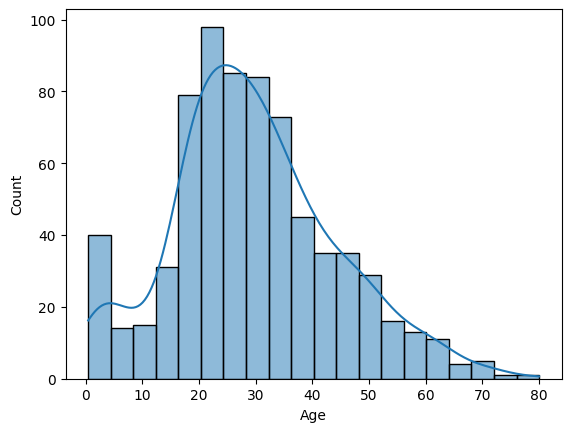

In [7]:
sns.histplot(df['Age'].dropna(),kde=True)

<Axes: xlabel='Age', ylabel='Count'>

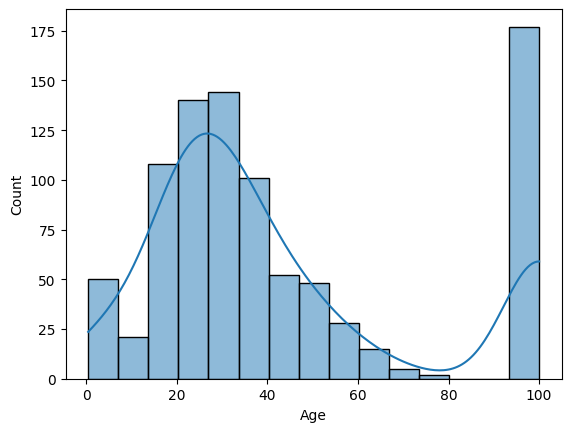

In [8]:
sns.histplot(df['Age'].fillna(100),kde=True)

### Gaussian distribution

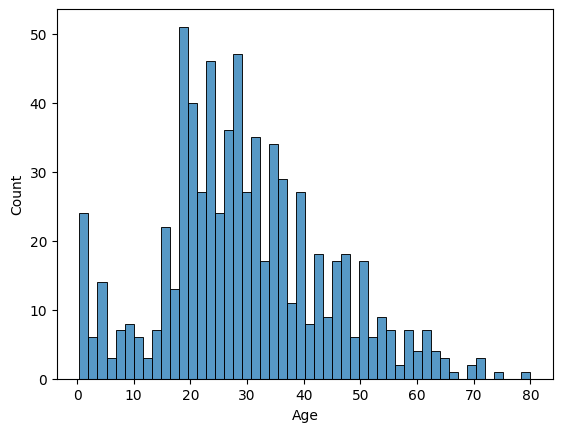

In [9]:
sns.histplot(df['Age'],bins=50)
plt.show()

<Axes: >

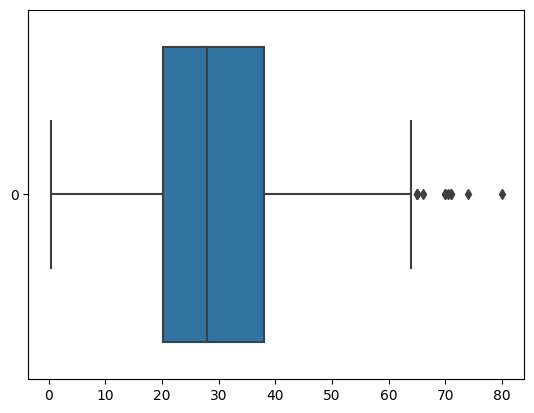

In [13]:
sns.boxplot(df['Age'],orient='h')

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Using 3rd standard deviation

In [16]:
age_mean = df.Age.mean()
upper_bound = age_mean + 3*df.Age.std()
lower_bound = age_mean - 3*df.Age.std()
print('Mean: ',age_mean)
print('Upper bound: ',upper_bound)
print('Lower bound: ',lower_bound)

Mean:  29.69911764705882
Upper bound:  73.27860964406094
Lower bound:  -13.880374349943303


### Skewed distribution

<Axes: xlabel='Fare', ylabel='Count'>

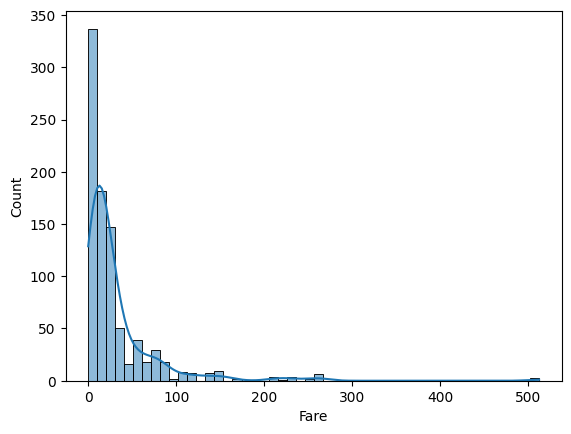

In [20]:
sns.histplot(df['Fare'],bins=50,kde=True)

<Axes: >

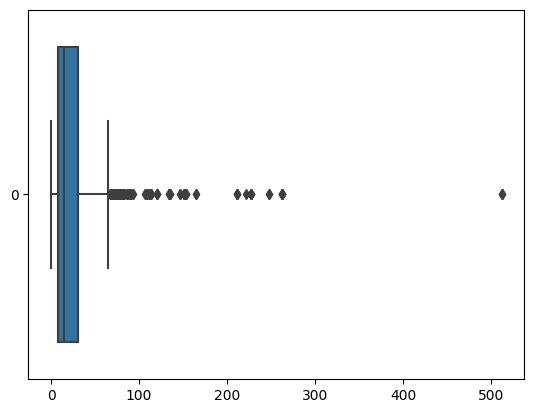

In [22]:
sns.boxplot(df['Fare'],orient='h')

In [23]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Using IQR interquantile range

In [24]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
lower = df.Fare.quantile(0.25) - (IQR*1.5)
upper = df.Fare.quantile(0.75) + (IQR*1.5)
print('IQR: ',IQR)
print('Lowr bound: ',lower)
print('Upper bound: ',upper)

IQR:  23.0896
Lowr bound:  -26.724
Upper bound:  65.6344


In [25]:
# Extreme outliers
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
lower = df.Fare.quantile(0.25) - (IQR*3)
upper = df.Fare.quantile(0.75) + (IQR*3)
print('IQR: ',IQR)
print('Lowr bound: ',lower)
print('Upper bound: ',upper)

IQR:  23.0896
Lowr bound:  -61.358399999999996
Upper bound:  100.2688


In [26]:
#replacing outlier by extreme value
df[df['Fare']>=100] = 100

In [30]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S
